In [2]:
from IPython.display import Image
Image("img/picture.png")
from IPython.core.display import HTML 
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

## Clasificación de Missing Values

In [16]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))

In [17]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

Ahora haremos el diagnóstico de missing values:

**Análisis para la columna rc**

In [19]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['sc','pcv','sg','hemo']

Diagnosis Analysis for sc:


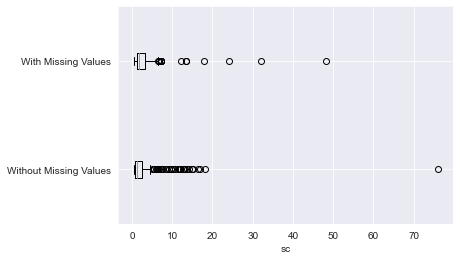

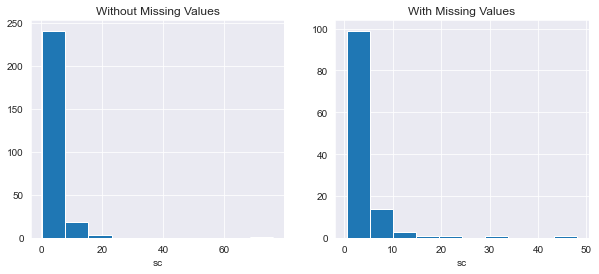

p-value of t-test: 0.18583257224831443
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


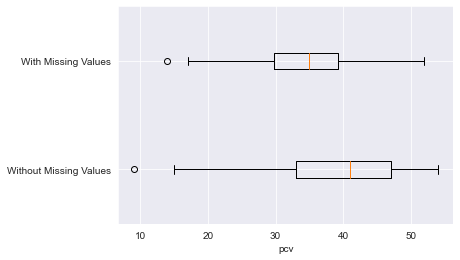

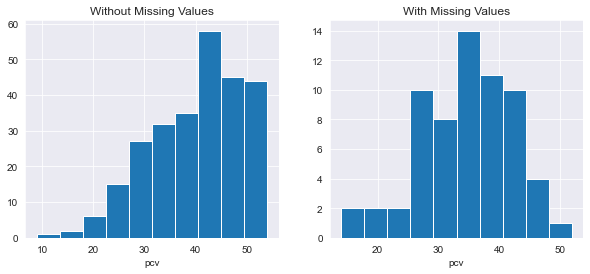

p-value of t-test: 1.552273251165168e-05
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


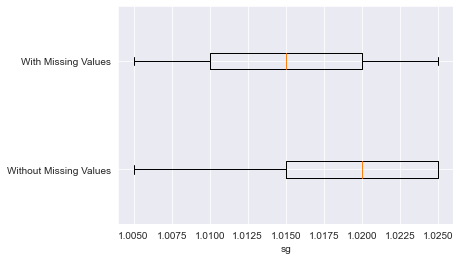

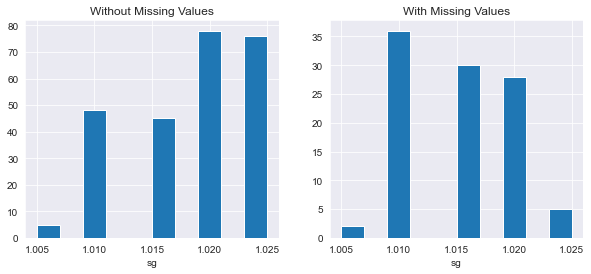

p-value of t-test: 1.0955628827436889e-07
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


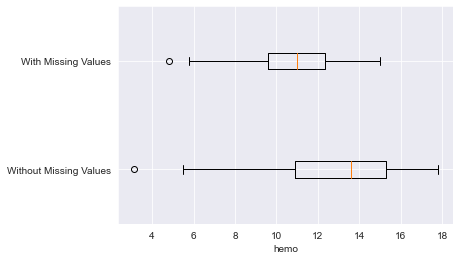

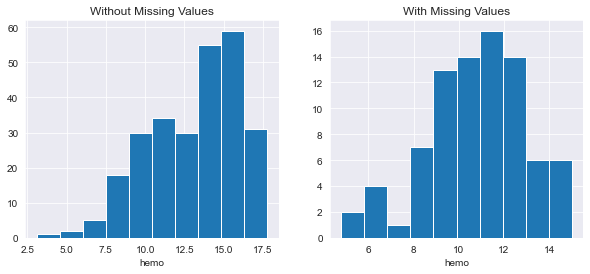

p-value of t-test: 2.9763626466020214e-10
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


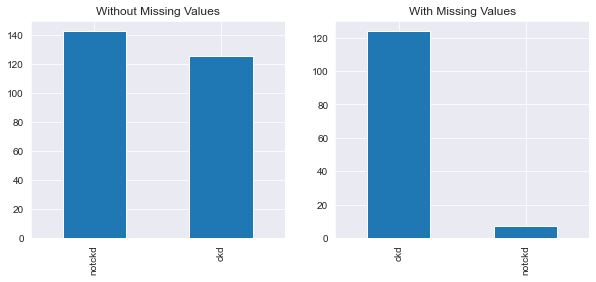

p-value of Chi_squared test: 5.168131718514657e-20
- - - - - - - - - divider - - - - - - - - - 


In [20]:
BM_MV = patient_df.rc.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

**Análisis para la columna sc**

Diagnosis Analysis for rc:


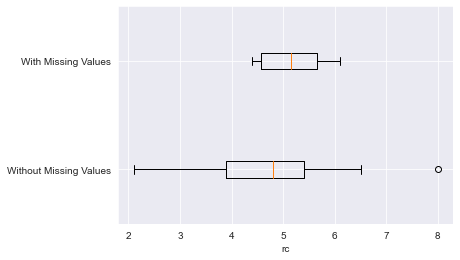

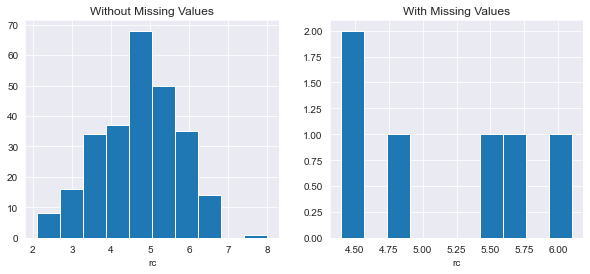

p-value of t-test: 0.2679867109793845
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


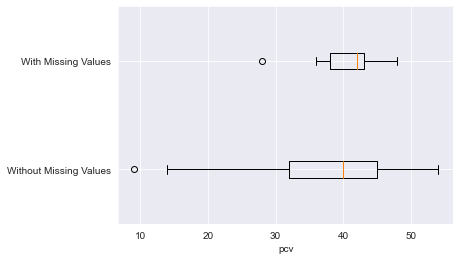

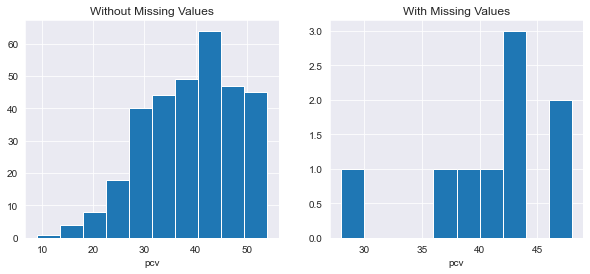

p-value of t-test: 0.5225987625338995
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


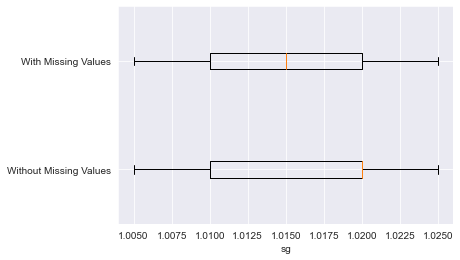

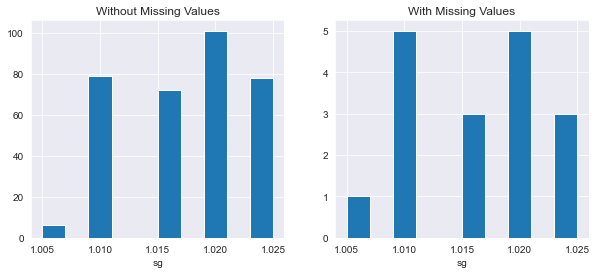

p-value of t-test: 0.363362432134856
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


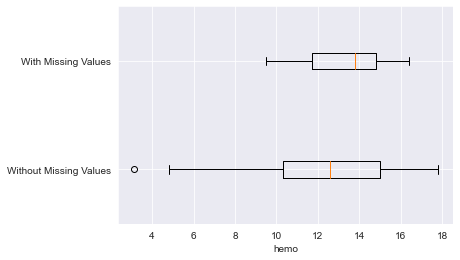

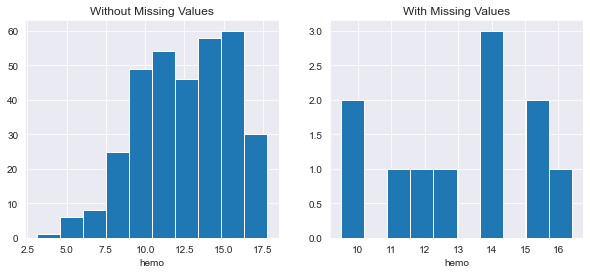

p-value of t-test: 0.4681304996025132
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


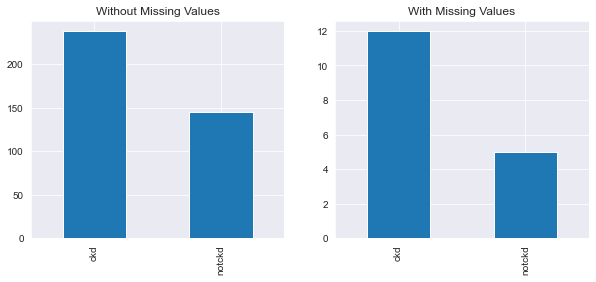

p-value of Chi_squared test: 0.6541676805409404
- - - - - - - - - divider - - - - - - - - - 


In [21]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','pcv','sg','hemo']

BM_MV = patient_df.sc.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

**Análisis para la columna pcv**

Diagnosis Analysis for rc:


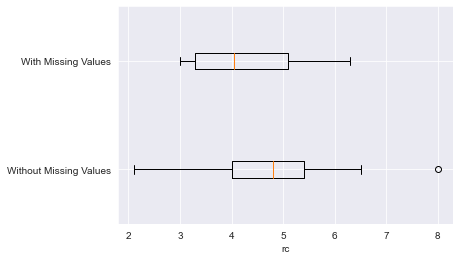

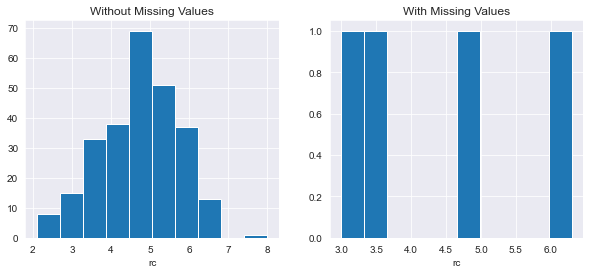

p-value of t-test: 0.4834207705489211
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


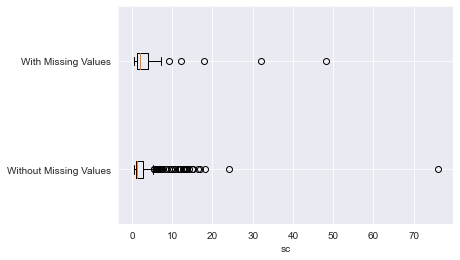

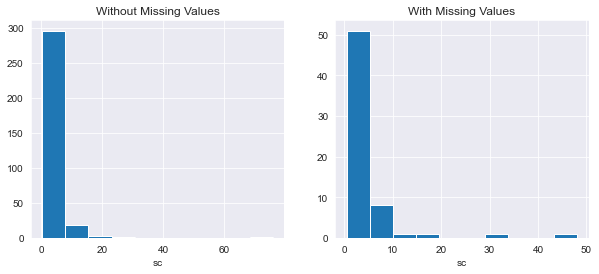

p-value of t-test: 0.09225178215961609
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


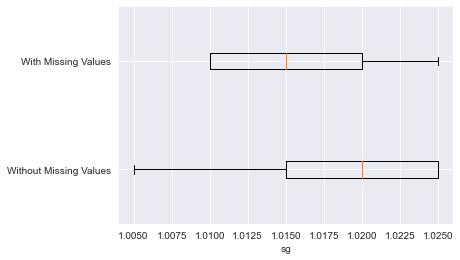

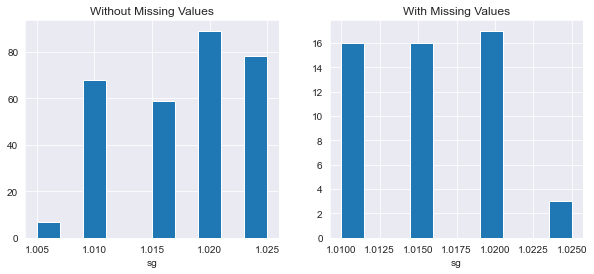

p-value of t-test: 0.01757923566523417
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


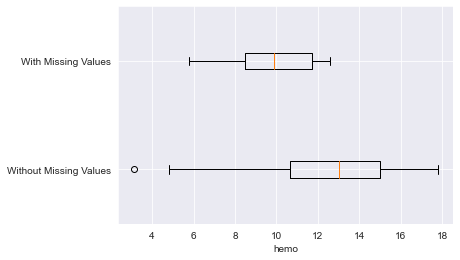

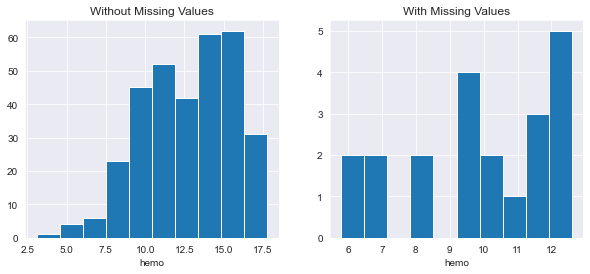

p-value of t-test: 1.5664018538667405e-05
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


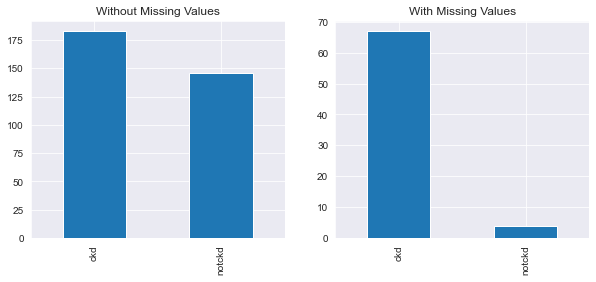

p-value of Chi_squared test: 2.2258514131489864e-09
- - - - - - - - - divider - - - - - - - - - 


In [22]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','sg','hemo']

BM_MV = patient_df.pcv.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

**Análisis para la columna sg**

Diagnosis Analysis for rc:


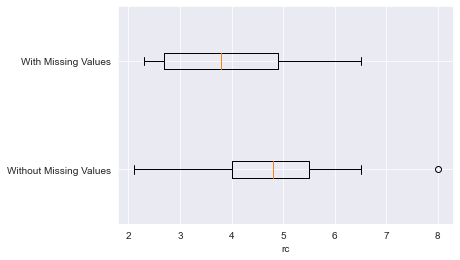

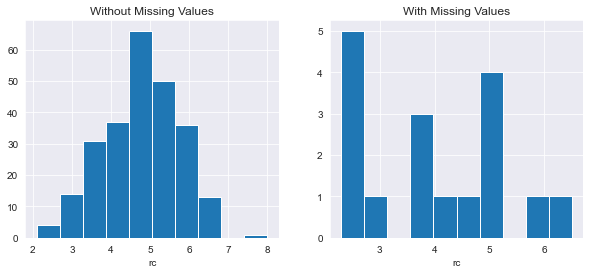

p-value of t-test: 0.00225068644343712
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


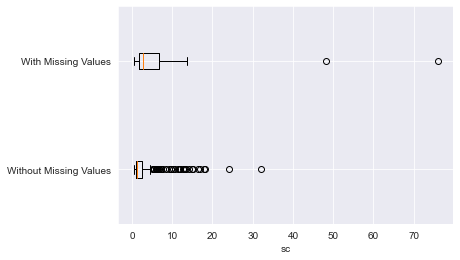

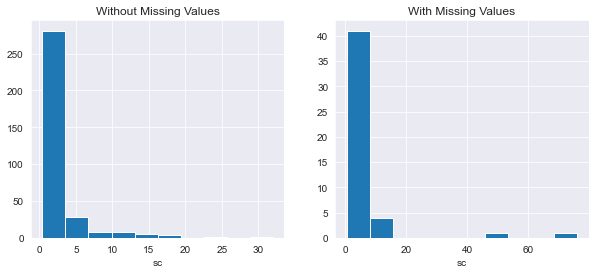

p-value of t-test: 7.153109526995942e-06
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


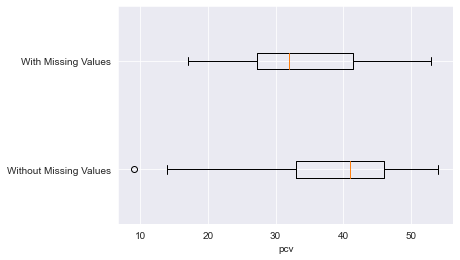

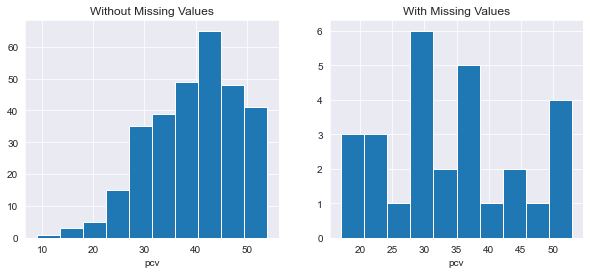

p-value of t-test: 0.0014894695918489607
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


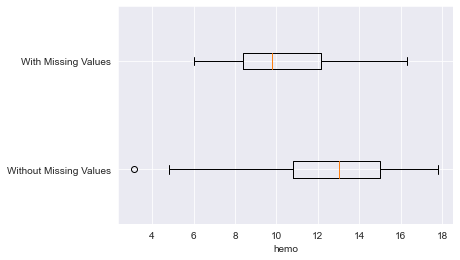

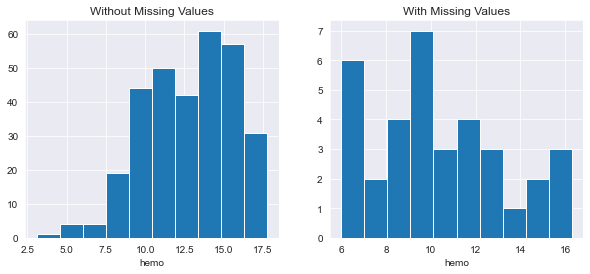

p-value of t-test: 2.7119421233597216e-06
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


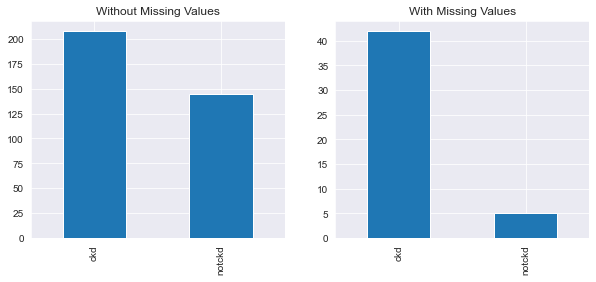

p-value of Chi_squared test: 0.00010072544367170718
- - - - - - - - - divider - - - - - - - - - 


In [23]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','pcv','hemo']

BM_MV = patient_df.sg.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

**Análisis para la columna hemo**

Diagnosis Analysis for rc:


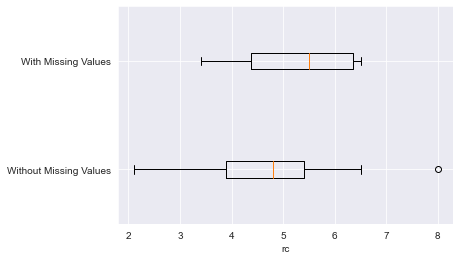

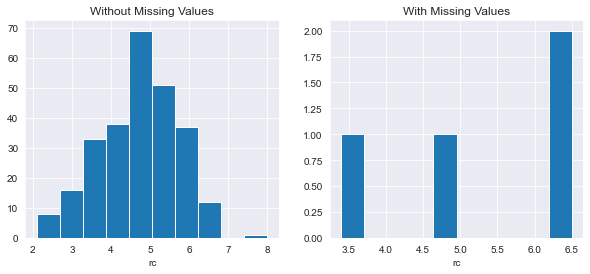

p-value of t-test: 0.30996898190520183
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


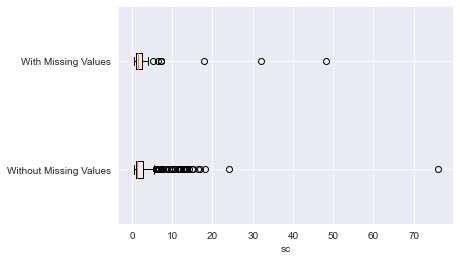

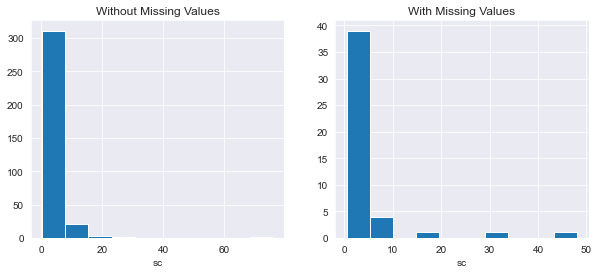

p-value of t-test: 0.17771862389361795
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


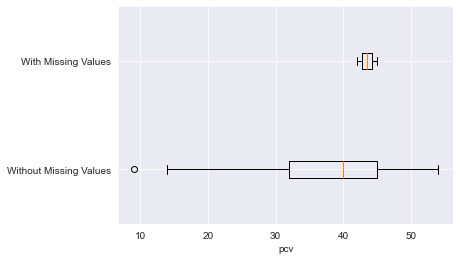

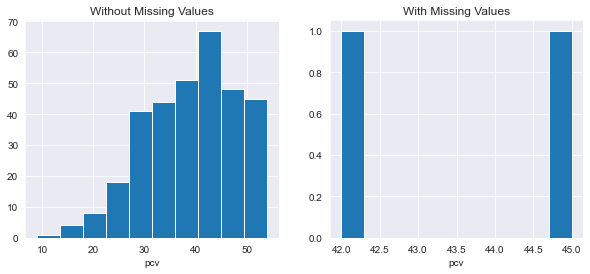

p-value of t-test: 0.46728803939148567
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


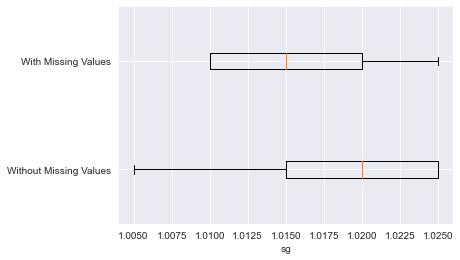

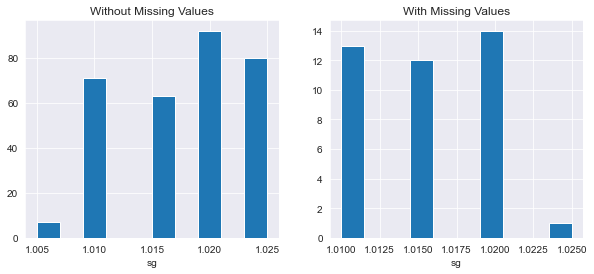

p-value of t-test: 0.016703395424493714
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


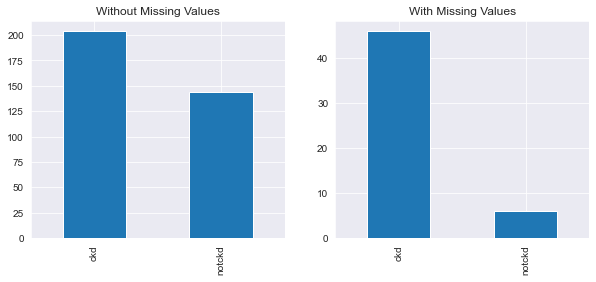

p-value of Chi_squared test: 6.542728784321527e-05
- - - - - - - - - divider - - - - - - - - - 


In [24]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','pcv','sg']

BM_MV = patient_df.hemo.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

In [25]:
patient_df['rc_BMV'] = patient_df.rc.isna().astype(int)
patient_df['pcv_BMV'] = patient_df.pcv.isna().astype(int)
patient_df['sg_BMV'] = patient_df.sg.isna().astype(int)
patient_df['hemo_BMV'] = patient_df.hemo.isna().astype(int)

In [26]:
patient_df.head()

,rc,sc,pcv,sg,hemo,diagnosis,rc_BMV,pcv_BMV,sg_BMV,hemo_BMV
0,5.2,1.2,44.0,1.020,15.4,ckd,0,0,0,0
1,NaN,0.8,38.0,1.020,11.3,ckd,1,0,0,0
2,NaN,1.8,31.0,1.010,9.6,ckd,1,0,0,0
3,3.9,3.8,32.0,1.005,11.2,ckd,0,0,0,0
4,4.6,1.4,35.0,1.010,11.6,ckd,0,0,0,0


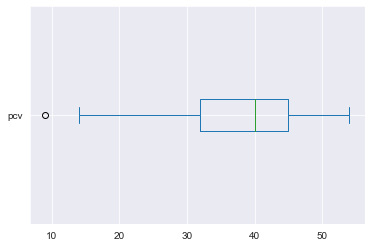

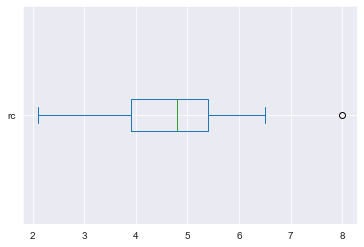

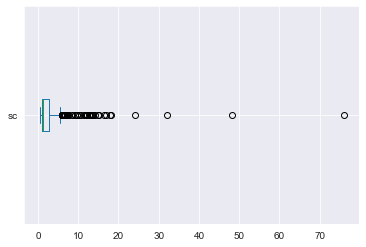

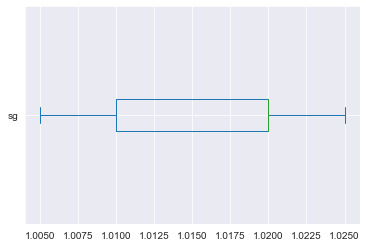

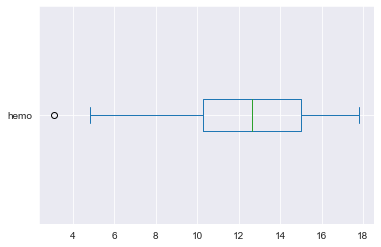

In [27]:
numerical_attributes = ['pcv','rc','sc','sg','hemo']
for att in numerical_attributes:
    patient_df[att].plot.box(vert=False)
    plt.show()

<ipython-input-28-16ab1dc1bed5>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  patient_df.fillna(patient_df.mean(),inplace=True)


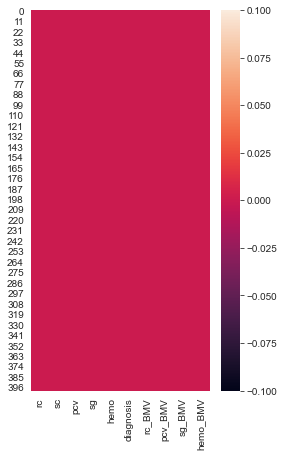

In [28]:
patient_df.sc.fillna(patient_df.sc.median(),inplace=True)
patient_df.fillna(patient_df.mean(),inplace=True)

plt.figure(figsize=(4,7))
sns.heatmap(patient_df.isna())
plt.show()

# Codificación de Data Categórica

## Introducción

- Modelos estadísticos trabajan con números
- Las variables no son siempre numéricas

## Técnicas de codificación

### One Hot Encoding

- Es uno de los esquemas de codificación más usados
- Por cada valor único en la columna categórica, se agrega una nueva columna.
- Es útil para variables categóricas nominales
- Misma distancia entre categorías

#### Ejemplo

Veamos un ejemplo con el dataset Titanic

In [136]:
titanic_data = sns.load_dataset('titanic')

In [137]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


La forma más fácil de codificar one hot es usando el método ``get_dummies()``

In [148]:
cod = pd.get_dummies(titanic_data['sex'])

cod.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Comprobemos...

In [149]:
pd.concat([titanic_data['sex'],
           pd.get_dummies(titanic_data['sex'])], axis=1).head()

,sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


**Ventajas**:
- No necesita supuestos acerca del dataset
- Permite calcular distancias

**Desventajas**:
- La dimensión del dataset puede crecer mucho 

### Codificación de Etiqueta 

- Los valores son reemplazados por enteros
- Se conoce como Codificación Entera

#### Ejemplo
Veamos un ejemplo con el dataset Titanic

In [153]:
titanic_data.head()

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton


Hagamos la codificación de la variable *class*

1.  importar la clase LabelEncoder del módulo preprocessing de la libreria sklearn

In [57]:
from sklearn.preprocessing import LabelEncoder

2. creamos un objeto de la clase

In [58]:
LabelEncoder?

In [59]:
le = LabelEncoder()

3. luego llamamos al método fit() del objeto y le damos como parámetro la columna

In [ ]:
le.fit?

In [60]:
le.fit(titanic_data['class'])  # acá estamos "entrenando"

LabelEncoder()

4. finalmente llamamos método transform y le damos la columna

In [61]:
titanic_data['le_class'] = le.transform(titanic_data['class'])

titanic_data.head(10)

,sex,class,embark_town,le_class
0,male,Third,Southampton,2
1,female,First,Cherbourg,0
2,female,Third,Southampton,2
3,female,First,Southampton,0
4,male,Third,Southampton,2
5,male,Third,Queenstown,2
6,male,First,Southampton,0
7,male,Third,Southampton,2
8,female,Third,Southampton,2
9,female,Second,Cherbourg,1


In [62]:
titanic_data  = titanic_data[["sex", "class", "embark_town"]]

**Ventajas:**
- Sirve para variables categóricas nominales y ordinales
- Cuando el orden se condice con la codificación, la distancia es adecuada

**Desventajas**
- En ciertos casos la codificación puede ser arbitraria

### Codificación de Frecuencia

- Es una forma de utilizar la frecuencia de las categorías como etiquetas
- En los casos en que la frecuencia se relaciona de alguna manera con la variable objetivo, ayuda al modelo a comprender y asignar el peso en proporción directa e inversa, según la naturaleza de los datos.

#### Ejemplo
Veamos un ejemplo con el dataset Titanic

In [66]:
titanic_data['embark_town'].value_counts()  # frecuencia

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [67]:
value_counts = titanic_data['embark_town'].value_counts().to_dict()  # lo paso a diccionario
print(value_counts)

{'Southampton': 644, 'Cherbourg': 168, 'Queenstown': 77}


In [68]:
titanic_data['embark_town'] = titanic_data["embark_town"].replace(value_counts)

In [69]:
titanic_data.head()

,sex,class,embark_town
0,male,Third,644
1,female,First,168
2,female,Third,644
3,female,First,644
4,male,Third,644


Ahora si queremos calcular el porcentaje de cada etiqueta...

In [70]:
titanic_data.isnull().sum()

sex            0
class          0
embark_town    2
dtype: int64

In [71]:
titanic_data.dropna(inplace = True)

In [72]:
porcentaje = (titanic_data['embark_town'].value_counts() / len(titanic_data) ).to_dict()
print(porcentaje)

{644: 0.7244094488188977, 168: 0.1889763779527559, 77: 0.08661417322834646}


In [73]:
titanic_data['embark_town'] = titanic_data['embark_town'].replace(porcentaje)
titanic_data.head()

,sex,class,embark_town
0,male,Third,0.724409
1,female,First,0.188976
2,female,Third,0.724409
3,female,First,0.724409
4,male,Third,0.724409


### Codificación Ordinal

- Se codifica sobre la base de su relación con el target
- Se divide la suma del target por la frecuencia

#### Ejemplo
Veamos un ejemplo con el dataset Titanic

In [81]:
titanic_data.groupby(['class'])['survived'].mean()

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [82]:
titanic_data.groupby(['class'])['survived'].mean().sort_values()

class
Third     0.242363
Second    0.472826
First     0.629630
Name: survived, dtype: float64

Como podemos ver, el valor *First* de la variable *class* tiene mayor cantidad de sobrevivientes

In [83]:
orden = titanic_data.groupby(['class'])['survived'].mean().sort_values().index
orden

CategoricalIndex(['Third', 'Second', 'First'], categories=['First', 'Second', 'Third'], ordered=False, dtype='category', name='class')

In [84]:
dicc= {k: i for i, k in enumerate(orden, 0)} # el 0 es el inicio

In [85]:
dicc

{'Third': 0, 'Second': 1, 'First': 2}

In [86]:
titanic_data['class_ordered'] = titanic_data['class'].replace(dicc)

In [87]:
titanic_data.head()

,sex,class,embark_town,survived,class_ordered
0,male,Third,Southampton,0,0
1,female,First,Cherbourg,1,2
2,female,Third,Southampton,1,0
3,female,First,Southampton,1,2
4,male,Third,Southampton,0,0


**Ventajas:**
- Sirve para variables categóricas nominales y ordinales
- Cuando el orden se condice con la codificación, la distancia es adecuada

**Desventajas**
- Debe haber una única variable target

### Codificación por promedio

- acá es lo mismo que antes, sólo que asignamos directamente el promedio

In [92]:
titanic_data.head()

,sex,class,embark_town,survived
0,male,Third,Southampton,0
1,female,First,Cherbourg,1
2,female,Third,Southampton,1
3,female,First,Southampton,1
4,male,Third,Southampton,0


In [93]:
titanic_data.groupby(['class'])['survived'].mean()

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [94]:
orden = titanic_data.groupby(['class'])['survived'].mean()

In [95]:
promedio = orden.to_dict()

In [96]:
promedio

{'First': 0.6296296296296297,
 'Second': 0.47282608695652173,
 'Third': 0.24236252545824846}

In [97]:
titanic_data['class_mean'] = titanic_data['class'].replace(promedio)
titanic_data.head()

,sex,class,embark_town,survived,class_mean
0,male,Third,Southampton,0,0.242363
1,female,First,Cherbourg,1,0.629630
2,female,Third,Southampton,1,0.242363
3,female,First,Southampton,1,0.629630
4,male,Third,Southampton,0,0.242363


# Discretización

## Introducción

- Convertimos valores continuos en intervalos discretos
- Ayuda con el manejo de outliers
- Hay 2 tipos: supervisada y no supervisada

## Técnicas de Discretización

### Discretización de igual ancho

- Es una de las más usadas
- El ancho de los intervalos es el mismo
- Es no supervisada

#### Ejemplo
Veamos un ejemplo práctico. Ocuparemos el dataset Diamonds.

In [18]:
diamond_data = sns.load_dataset('diamonds')

In [19]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Vamos a discretizar la columna *price* en 10 intervalos de igual tamaño

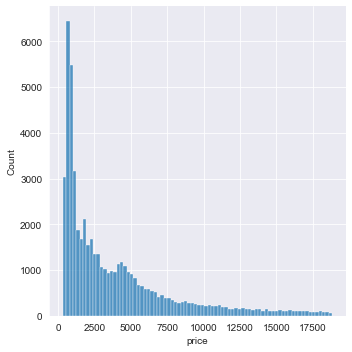

In [20]:
sns.displot(diamond_data['price'])

Calculemos el rango

In [30]:
rango = diamond_data['price'].max() - diamond_data['price'].min()

In [31]:
rango

18497

Si queremos 10 intervalos, el largo de cada intervalo será

In [33]:
rango / 10

1849.7

In [34]:
largo_intervalo = int(np.round(rango / 10))

In [35]:
largo_intervalo

1850

Calculemos el límite inferior del primer intervalo y el límite superior del ultimo intervalo

In [36]:
diamond_data['price'].min()

326

In [37]:
limite_inferior = int(np.floor( diamond_data['price'].min()))

In [38]:
limite_inferior

326

In [39]:
diamond_data['price'].max()

18823

In [40]:
limite_superior = int(np.ceil( diamond_data['price'].max()))

In [41]:
limite_superior

18823

In [ ]:
range?

In [42]:
total_intervalos = [i for i in range(limite_inferior, limite_superior, largo_intervalo)] #start, stop, step

In [43]:
total_intervalos

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976]

In [44]:
total_intervalos = [i for i in range(limite_inferior, limite_superior+30000, largo_intervalo)] #start, stop, step

In [45]:
total_intervalos

[326,
 2176,
 4026,
 5876,
 7726,
 9576,
 11426,
 13276,
 15126,
 16976,
 18826,
 20676,
 22526,
 24376,
 26226,
 28076,
 29926,
 31776,
 33626,
 35476,
 37326,
 39176,
 41026,
 42876,
 44726,
 46576,
 48426]

In [46]:
total_intervalos = [i for i in range(limite_inferior, limite_superior+largo_intervalo, largo_intervalo)] #start, stop, step

In [47]:
total_intervalos

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]

In [48]:
etiquetas_intervalos = ['Bin_no_' + str(i) for i in range(1, len(total_intervalos))] #acá sin step va de 1 en 1

In [49]:
etiquetas_intervalos

['Bin_no_1',
 'Bin_no_2',
 'Bin_no_3',
 'Bin_no_4',
 'Bin_no_5',
 'Bin_no_6',
 'Bin_no_7',
 'Bin_no_8',
 'Bin_no_9',
 'Bin_no_10']

In [50]:
pd.cut?

El argumento *include_lowest* es para escoger si el primer intervalo sea o no cerrado ``[] (] (] (]`` vs ``(] (] (] (]``

In [125]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=total_intervalos, labels=etiquetas_intervalos, include_lowest=True)

In [126]:
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


In [127]:
conteo = diamond_data.groupby('price_bins')['price'].count()

In [128]:
conteo

price_bins
Bin_no_1     25342
Bin_no_2      9324
Bin_no_3      7391
Bin_no_4      3879
Bin_no_5      2366
Bin_no_6      1741
Bin_no_7      1308
Bin_no_8      1002
Bin_no_9       862
Bin_no_10      725
Name: price, dtype: int64

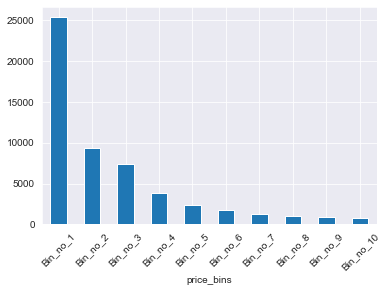

In [129]:
conteo.plot.bar()
plt.xticks(rotation=45);

In [130]:
sns.countplot?

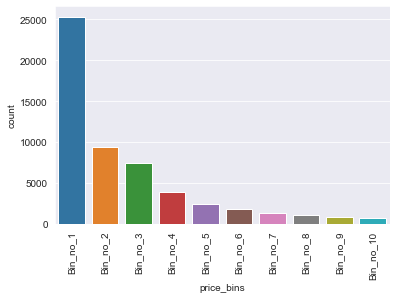

In [132]:
sns.countplot(x="price_bins",data=diamond_data)
plt.xticks(rotation=90);

### Discretización de igual frecuencia

- Acá el tamaño del intervalo es tal que en cada intervalo cae el mismo número de observaciones
- Es no supervisada

In [133]:
Image(url="https://i0.wp.com/lasmatesfaciles.com/wp-content/uploads/2021/06/image-9.png?w=559&ssl=1")

#### Ejemplo

Veamos un ejemplo con la columna *price* del dataset Diamonds

In [51]:
diamond_data = sns.load_dataset('diamonds')

In [52]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Para obtener los intervalos con igual cantidad de observaciones ocupamos la función *qcut()*

In [53]:
etiquetas = ['Bin_no_' +str(i) for i in range(1,11)]

In [54]:
etiquetas

['Bin_no_1',
 'Bin_no_2',
 'Bin_no_3',
 'Bin_no_4',
 'Bin_no_5',
 'Bin_no_6',
 'Bin_no_7',
 'Bin_no_8',
 'Bin_no_9',
 'Bin_no_10']

In [56]:
pd.qcut?

In [101]:
precio_discretizado, bins = pd.qcut(diamond_data['price'], 10, labels=etiquetas, retbins=True, precision=3, duplicates='raise')

In [102]:
precio_discretizado

0        Bin_no_1
1        Bin_no_1
2        Bin_no_1
3        Bin_no_1
4        Bin_no_1
           ...   
53935    Bin_no_6
53936    Bin_no_6
53937    Bin_no_6
53938    Bin_no_6
53939    Bin_no_6
Name: price, Length: 53940, dtype: category
Categories (10, object): ['Bin_no_1' < 'Bin_no_2' < 'Bin_no_3' < 'Bin_no_4' ... 'Bin_no_7' < 'Bin_no_8' < 'Bin_no_9' < 'Bin_no_10']

In [103]:
bins

array([  326. ,   646. ,   837. ,  1087. ,  1698. ,  2401. ,  3465. ,
        4662. ,  6301.2,  9821. , 18823. ])

Veamos cómo quedó...

In [104]:
data_precio = diamond_data[['price']]
data_precio['precio_discretizado'] = precio_discretizado

<ipython-input-104-993ff0b6db87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_precio['precio_discretizado'] = precio_discretizado


In [105]:
data_precio

,price,precio_discretizado
0,326,Bin_no_1
1,326,Bin_no_1
2,327,Bin_no_1
3,334,Bin_no_1
4,335,Bin_no_1
...,...,...
53935,2757,Bin_no_6
53936,2757,Bin_no_6
53937,2757,Bin_no_6
53938,2757,Bin_no_6


Revisemos la frecuencia

In [106]:
precio_discretizado.value_counts()

Bin_no_1     5411
Bin_no_5     5405
Bin_no_3     5396
Bin_no_9     5395
Bin_no_7     5394
Bin_no_10    5393
Bin_no_8     5389
Bin_no_4     5388
Bin_no_2     5385
Bin_no_6     5384
Name: price, dtype: int64

In [110]:
data_precio.sort_values('price')[5389:5411]

,price,precio_discretizado
27360,646,Bin_no_1
27362,646,Bin_no_1
27363,646,Bin_no_1
27054,646,Bin_no_1
27053,646,Bin_no_1
27052,646,Bin_no_1
27051,646,Bin_no_1
27050,646,Bin_no_1
27049,646,Bin_no_1
27364,646,Bin_no_1


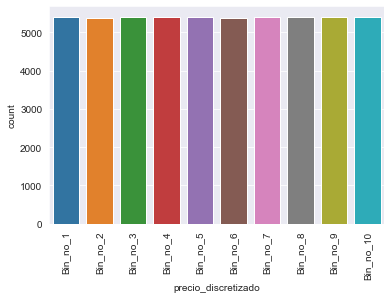

In [111]:
sns.countplot(x="precio_discretizado",data=data_precio)
plt.xticks(rotation=90);

### Discretización por K-Means

- Se basa en el algoritmo de K-Means

*Algoritmo K-Means*
1. Se crean K clusters aleatorios, con K el número de intervalos.
2. Cada punto de la población se asocia al cluster con el centro más cercano.
3. Se actualizan los centros de todos los clusters.

In [112]:
Image(url="https://raw.githubusercontent.com/satishgunjal/images/master/K_means_Clustering.gif")

#### Ejemplo

Veamos un ejemplo discretizando la columna *price* del dataset Diamonds

Primero, vamos a importar la clase *KBinsDiscretizer* del módulo *preprocessing* del la librería *sklearn*

In [114]:
from sklearn.preprocessing import KBinsDiscretizer

In [115]:
diamond_data = sns.load_dataset('diamonds')

In [116]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Llamamos al método *KBinsDiscretizer()* para crear un objeto de la clase

In [117]:
KBinsDiscretizer?

In [118]:
discretization = KBinsDiscretizer(n_bins=10,encode="ordinal", strategy='kmeans') # el argumento encode entrega los intervalos codificados

Luego llamamos al método *fit()* y le pasamos la columna a discretizar

In [119]:
discretization.fit(diamond_data[['price']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

utilizamos el método *transform()* para obtener las etiquetas

In [120]:
discretization.transform(diamond_data[['price']])

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [121]:
diamond_data["ordinal_bins"] = discretization.transform(diamond_data[['price']])

In [122]:
diamond_data

,carat,cut,color,clarity,depth,table,price,x,y,z,ordinal_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1.0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,1.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1.0


In [123]:
np.unique(discretization.transform(diamond_data[['price']]))

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Pero siguiendo el mismo método que antes tenemos...

utilizamos el atributo *bin_edges_* para obtener los bins

In [124]:
intervalos = discretization.bin_edges_.tolist()

In [125]:
intervalos

[array([  326.        ,  1492.78643064,  2879.05730293,  4308.05906601,
         5843.59336918,  7649.12113784,  9636.73187241, 11747.84144024,
        13992.95066605, 16339.91790883, 18823.        ])]

In [126]:
bins = intervalos[0]

In [127]:
bins

array([  326.        ,  1492.78643064,  2879.05730293,  4308.05906601,
        5843.59336918,  7649.12113784,  9636.73187241, 11747.84144024,
       13992.95066605, 16339.91790883, 18823.        ])

In [128]:
etiquetas = ['Bin_no_' +str(i) for i in range(1,11)]

In [129]:
etiquetas

['Bin_no_1',
 'Bin_no_2',
 'Bin_no_3',
 'Bin_no_4',
 'Bin_no_5',
 'Bin_no_6',
 'Bin_no_7',
 'Bin_no_8',
 'Bin_no_9',
 'Bin_no_10']

In [130]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=bins, labels=etiquetas, include_lowest=True)

In [131]:
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,ordinal_bins,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.0,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.0,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.0,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0.0,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,0.0,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,0.0,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,0.0,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,0.0,Bin_no_1


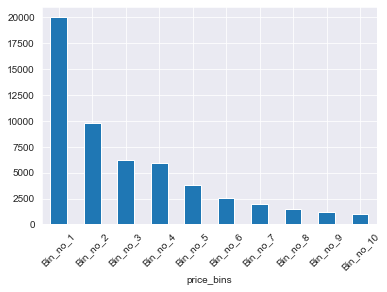

In [132]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45);

### Discretización por Árbol de Decisión

- Es supervisada (los bins se en crean en base a otras columnas)
- El árbol de decisión identifica la cantidad óptima de intervalos

In [163]:
Image(url= "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png")

In [135]:
Image(url="https://miro.medium.com/max/720/1*XMId5sJqPtm8-RIwVVz2tg.png")

#### Ejemplo
Veamos cómo discretizar la columna *price* del dataset Diamonds, basándonos en los valores de la columna *cut*

Antes, debemos importar la clase *DecisionTreeClassifier* del módulo *tree* de la librería *sklearn*

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
diamond_data = sns.load_dataset('diamonds')

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [166]:
tree_model = DecisionTreeClassifier(max_depth=3)

In [167]:
tree_model.fit(diamond_data['price'].to_frame(), diamond_data['cut'])

DecisionTreeClassifier(max_depth=3)

In [168]:
proba = tree_model.predict_proba(diamond_data['price'].to_frame())

In [170]:
diamond_data["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [169]:
proba # tengo 5 columnas porque tengo 5 categorías en la variable target (cut)

array([[0.00368615, 0.12743549, 0.3580832 , 0.12796209, 0.38283307],
       [0.00368615, 0.12743549, 0.3580832 , 0.12796209, 0.38283307],
       [0.00368615, 0.12743549, 0.3580832 , 0.12796209, 0.38283307],
       ...,
       [0.05216802, 0.0964318 , 0.36766034, 0.24074074, 0.2429991 ],
       [0.05216802, 0.0964318 , 0.36766034, 0.24074074, 0.2429991 ],
       [0.05216802, 0.0964318 , 0.36766034, 0.24074074, 0.2429991 ]])

In [ ]:
proba.sort?

In [171]:
proba.sort()

In [172]:
proba

array([[0.00368615, 0.12743549, 0.12796209, 0.3580832 , 0.38283307],
       [0.00368615, 0.12743549, 0.12796209, 0.3580832 , 0.38283307],
       [0.00368615, 0.12743549, 0.12796209, 0.3580832 , 0.38283307],
       ...,
       [0.05216802, 0.0964318 , 0.24074074, 0.2429991 , 0.36766034],
       [0.05216802, 0.0964318 , 0.24074074, 0.2429991 , 0.36766034],
       [0.05216802, 0.0964318 , 0.24074074, 0.2429991 , 0.36766034]])

In [173]:
diamond_data["price_tree"] = proba[:,4]

In [174]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_tree
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.382833
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.382833
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.382833
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.382833
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.382833


In [175]:
diamond_data['price_tree'].unique()  # 8 hojas, 8 probabilidades

array([0.38283307, 0.39545186, 0.36766034, 0.39513889, 0.28518859,
       0.33674372, 0.52249285, 0.47231003])

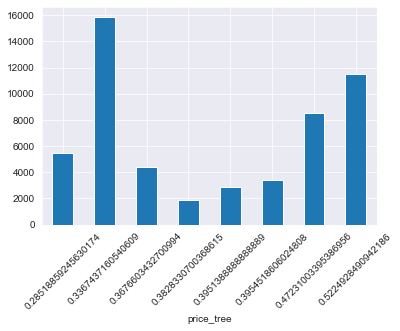

In [176]:
diamond_data.groupby(['price_tree'])['price'].count().plot.bar()
plt.xticks(rotation=45);

Notemos que este método etiqueta los datos, pero necesitamos recuperar los intervalos, como veremos a continuación

obtengo los bins sacando el máximo de cada etiqueta

In [177]:
diamond_data.groupby(['price_tree'])['price'].max()

price_tree
0.285189     4732
0.336744    18823
0.367660     2882
0.382833      505
0.395139     3544
0.395452      644
0.472310     2178
0.522493     1130
Name: price, dtype: int64

In [178]:
bins = diamond_data.groupby(['price_tree'])['price'].max().values

In [179]:
bins

array([ 4732, 18823,  2882,   505,  3544,   644,  2178,  1130],
      dtype=int64)

In [180]:
bins.sort()

In [181]:
bins

array([  505,   644,  1130,  2178,  2882,  3544,  4732, 18823],
      dtype=int64)

Agrego el inicio del primer intervalo

In [182]:
bins = np.insert(bins,0,diamond_data["price"].min()) #inserta el valor mínimo en el arreglo "bins" en la posición "0"

In [183]:
bins

array([  326,   505,   644,  1130,  2178,  2882,  3544,  4732, 18823],
      dtype=int64)

In [184]:
 diamond_data["price_tree2"]=pd.cut(x=diamond_data['price'], bins=bins, include_lowest=True)

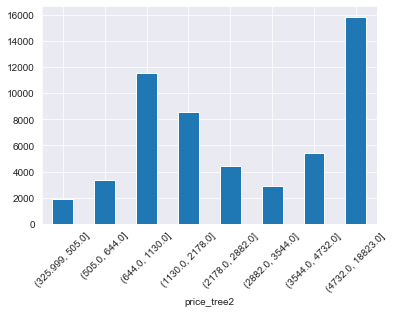

In [185]:
diamond_data.groupby(['price_tree2'])['price'].count().plot.bar()
plt.xticks(rotation=45);

In [186]:
diamond_data["price_tree2"].value_counts()

(4732.0, 18823.0]    15834
(644.0, 1130.0]      11537
(1130.0, 2178.0]      8541
(3544.0, 4732.0]      5435
(2178.0, 2882.0]      4428
(505.0, 644.0]        3386
(2882.0, 3544.0]      2880
(325.999, 505.0]      1899
Name: price_tree2, dtype: int64

In [187]:
diamond_data["price_tree"].value_counts()

0.336744    15834
0.522493    11537
0.472310     8541
0.285189     5435
0.367660     4428
0.395452     3386
0.395139     2880
0.382833     1899
Name: price_tree, dtype: int64

### Discretización Personalizada

- Le damos los bins que nosotros queremos.

Veamos un ejemplo discretizando la columna *tip* del dataset Tips

En este conjunto de datos hay información sobre propinas dejadas en un restaurante, con información sobre el día en el que se produjo, si fue en el almuerzo o la cena, el número de comensales, el sexo de la persona que dejó la propina, si era fumador o no...

In [188]:
tips_data = sns.load_dataset('tips')

In [189]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Veamos el valor mínimo y máximo de la columna antes de definir los bins

In [190]:
tips_data['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [191]:
bins = [0, 3, 7, 10]

In [192]:
etiquetas = ['0-3', '3-7', '7-10']

In [193]:
tips_data['tip_bins'] = pd.cut(tips_data['tip'], bins=bins, labels=etiquetas, include_lowest=True)

In [194]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_bins
0,16.99,1.01,Female,No,Sun,Dinner,2,0-3
1,10.34,1.66,Male,No,Sun,Dinner,3,0-3
2,21.01,3.50,Male,No,Sun,Dinner,3,3-7
3,23.68,3.31,Male,No,Sun,Dinner,2,3-7
4,24.59,3.61,Female,No,Sun,Dinner,4,3-7


(array([0, 1, 2]), [Text(0, 0, '0-3'), Text(1, 0, '3-7'), Text(2, 0, '7-10')])

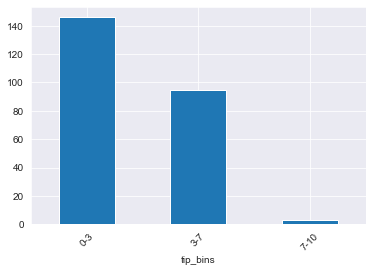

In [195]:
tips_data.groupby('tip_bins')['tip'].count().plot.bar()
plt.xticks(rotation=45)